# Creating a Filter

**High-pass** filters detect big chenges in image intensity or color at object boundares and **detects edges** of the object. Can also sharpen picture, enchance high-frequency parts of the image.

**Low-pass** filtes pre-process image to **reduce noise** or unwanted details of the image.
## Edge Detection

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### Creating a Filter Using a Custom Kernel

In the below example, we use OpenCV's `filter2D` function, which is documented [here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html) and it can be used to filter images in a variety of ways.

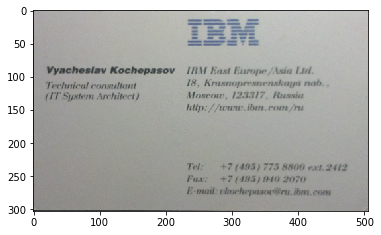

In [5]:
img = cv2.cvtColor( cv2.imread('card-std.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

We want to detect changes in image intensity.

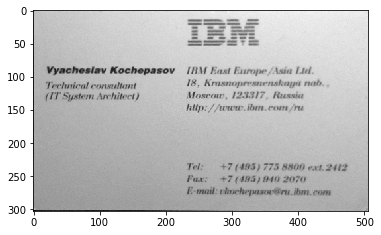

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

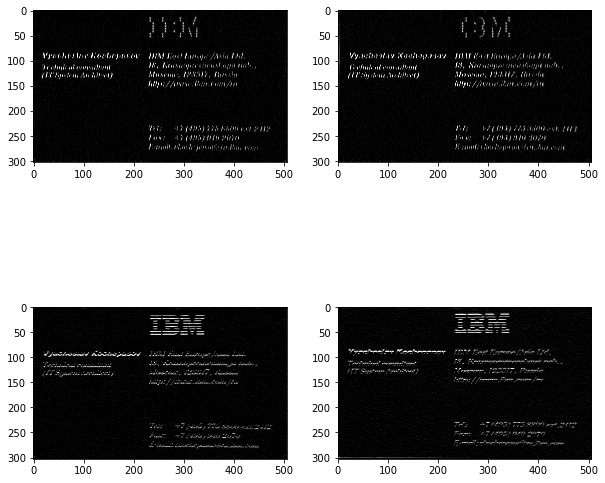

In [19]:
# kernel = Sobel filter = aproximation of gradient detected
sobel_xr = np.array([
    [-1,  0, +1],
    [-2,  0, +2],
    [-1,  0, +1],
])

sobel_xl = np.fliplr(sobel_xr)

sobel_yu = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [+1, +2, +1],
])

sobel_yd = np.flipud(sobel_yu)

# convolt image with the filter
filtered_xr = cv2.filter2D(gray, -1, sobel_xr)
filtered_xl = cv2.filter2D(gray, -1, sobel_xl)
filtered_yu = cv2.filter2D(gray, -1, sobel_yu)
filtered_yd = cv2.filter2D(gray, -1, sobel_yd)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(filtered_xl, cmap='gray')
plt.subplot(222)
plt.imshow(filtered_xr, cmap='gray')
plt.subplot(223)
plt.imshow(filtered_yu, cmap='gray')
plt.subplot(224)
plt.imshow(filtered_yd, cmap='gray')

Create combination image.
Convert detection images to binary format (black & white) that add-up all in one.

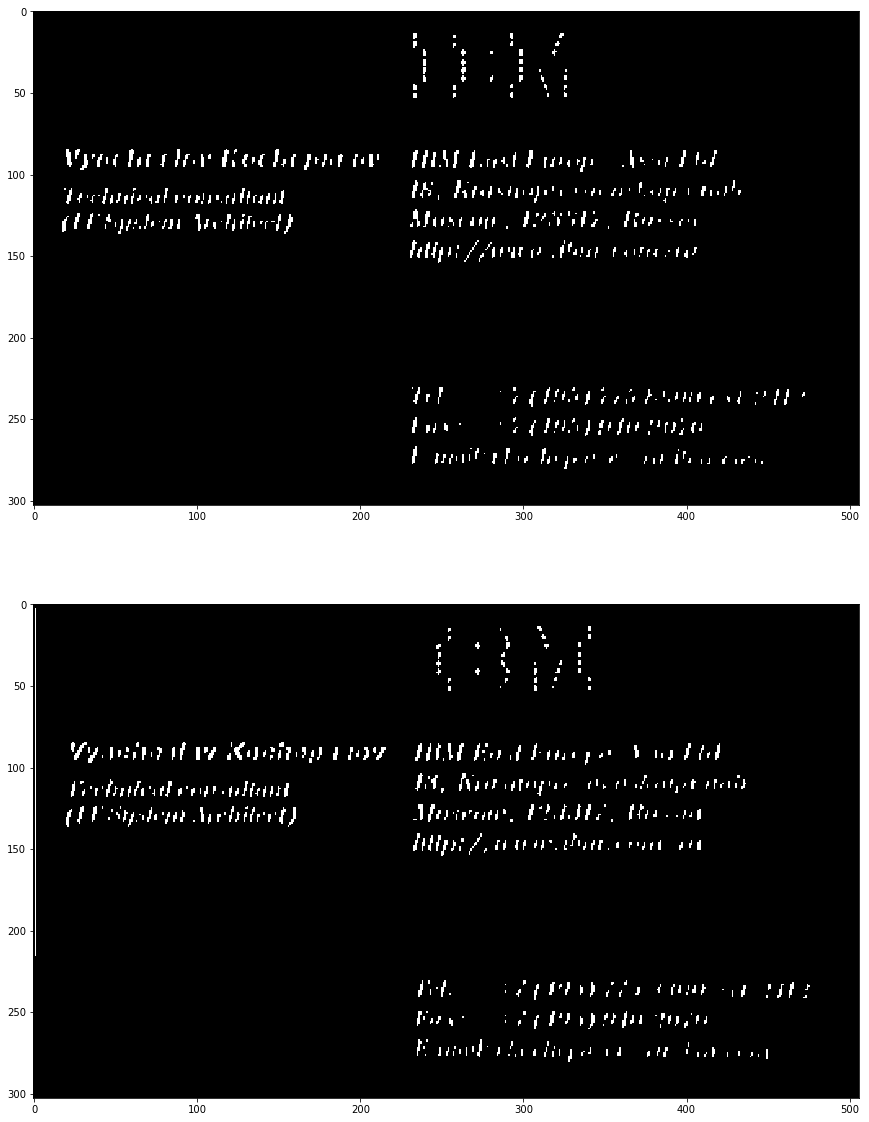

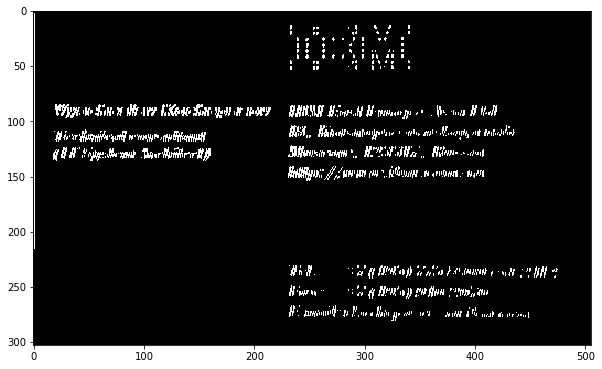

In [35]:
lo, up = 110, 255

retVal, b_xl = cv2.threshold(filtered_xl, lo, up, cv2.THRESH_BINARY)
retVal, b_xr = cv2.threshold(filtered_xr, lo, up, cv2.THRESH_BINARY)
plt.figure(figsize=(20, 20))
plt.subplot(211)
plt.imshow(b_xl, cmap='gray')
plt.subplot(212)
plt.imshow(b_xr, cmap='gray')

# edge detection mark at ether side of an edge, compensation shift required
b_x = b_xl + b_xr
plt.figure(figsize=(10, 20))
plt.imshow(b_x, cmap='gray')

You can see, same edge been detected by left and right filters in result image gets wider. Cause edge detection mark at ether side of an edge, **compensation shift** is required.

## Noise removal

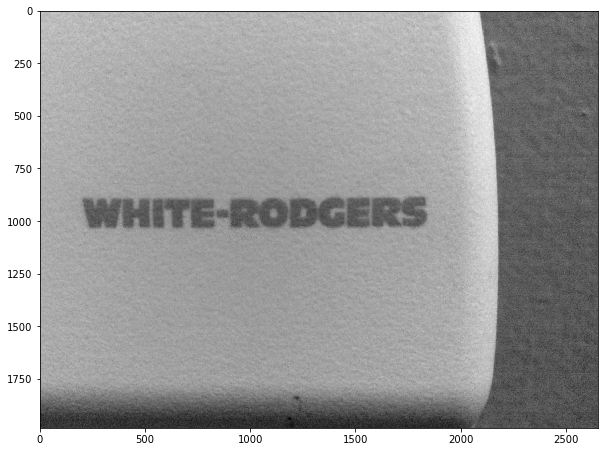

In [44]:
img = cv2.imread('termostat.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

### Gaussian Blur
See more details on the [Smoothing Images OpenCV tutorial](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html).

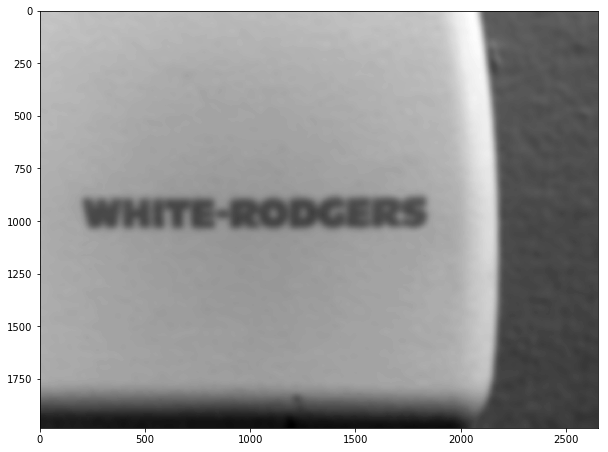

In [57]:
blur = cv2.GaussianBlur(img, (0,0), sigmaX=14)
#median = cv2.medianBlur(img, 9)


plt.figure(figsize=(10,10))
plt.imshow(blur, cmap='gray')

Compare edge detection performance on both images. Notice how important to apply small **blur before** sober edge detection.

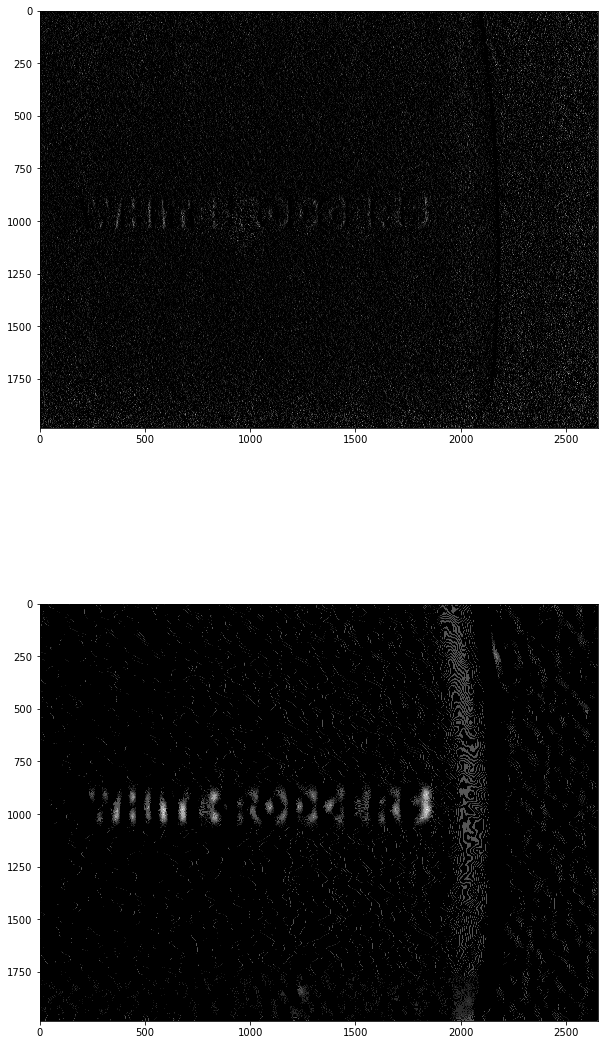

In [59]:
edOriginal = cv2.filter2D(img, -1, sobel_xr)
edBlur = cv2.filter2D(blur, -1, sobel_xr)

plt.figure(figsize=(10,20))
plt.subplot(211)
plt.imshow(edOriginal, cmap='gray')
plt.subplot(212)
plt.imshow(edBlur, cmap='gray')

## Canny Edge Detection
Canny Edge Detection is multi step process producing high quality edge detection. More info [here](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html).

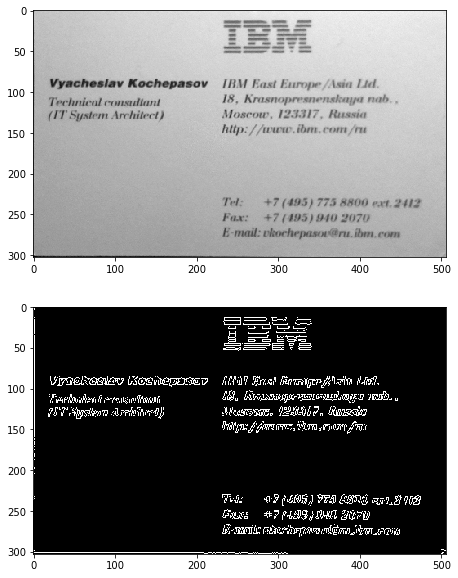

In [72]:
# Canny uses hysteressis to select important edges only
loHys, hiHys = 30, 100 
# keep ratio between 1:2 and 1:3 for best performance
# Canny produces binary image
edges = cv2.Canny(gray, loHys, hiHys)

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.imshow(gray, cmap='gray')
plt.subplot(212)
plt.imshow(edges, cmap='gray')